Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.
¿Sobre qué columnas podremos eliminar o reemplazar los outliers?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns=None

In [3]:
df_bank = pd.read_csv("datos/bank-additional-full-edit2.csv", index_col=0).reset_index(drop=True)


In [4]:
df_bank.tail(15)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,month_day_week,loan2,housing2,default2,education2,job2,month,day_week
41161,62,retired,married,university.degree,0.0,1.0,0.0,cellular,329,1,999,2,FAILURE,-1.1,94.767,-50.8,1.031,4963.6,yes,"['nov', 'thu']",No,Si,No,university degree,retired,['nov','thu']
41162,62,retired,married,university.degree,0.0,1.0,0.0,cellular,208,1,1,6,SUCCESS,-1.1,94.767,-50.8,1.031,4963.6,yes,"['nov', 'thu']",No,Si,No,university degree,retired,['nov','thu']
41163,34,student,single,NaN,0.0,1.0,0.0,cellular,180,1,999,2,FAILURE,-1.1,94.767,-50.8,1.031,4963.6,no,"['nov', 'thu']",No,Si,No,NaN,student,['nov','thu']
41164,38,housemaid,divorced,high.school,0.0,1.0,1.0,cellular,360,1,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.031,4963.6,no,"['nov', 'thu']",Si,Si,No,high school,housemaid,['nov','thu']
41165,57,retired,married,professional.course,0.0,1.0,0.0,cellular,124,6,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.031,4963.6,no,"['nov', 'thu']",No,Si,No,professional course,retired,['nov','thu']
41166,62,retired,married,university.degree,0.0,0.0,0.0,cellular,483,2,6,3,SUCCESS,-1.1,94.767,-50.8,1.031,4963.6,yes,"['nov', 'thu']",No,No,No,university degree,retired,['nov','thu']
41167,64,retired,divorced,professional.course,0.0,1.0,0.0,cellular,151,3,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']",No,Si,No,professional course,retired,['nov','fri']
41168,36,admin.,married,university.degree,0.0,0.0,0.0,cellular,254,2,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']",No,No,No,university degree,administrativo,['nov','fri']
41169,37,admin.,married,university.degree,0.0,1.0,0.0,cellular,281,1,999,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,yes,"['nov', 'fri']",No,Si,No,university degree,administrativo,['nov','fri']
41170,29,unemployed,single,basic.4y,0.0,1.0,0.0,cellular,112,1,9,1,SUCCESS,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']",No,Si,No,basic 4y,unemployed,['nov','fri']


Podemos detectar outliers en las columnas numéricas.

In [5]:
df_bank["pdays"] = df_bank["pdays"].apply(lambda banco: np.nan if banco == 999 else banco)

In [6]:
df_bank_numericas = df_bank.select_dtypes(include=np.number).drop(["default", "housing", "loan"], axis = 1)

In [7]:
df_bank.tail(15)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,month_day_week,loan2,housing2,default2,education2,job2,month,day_week
41161,62,retired,married,university.degree,0.0,1.0,0.0,cellular,329,1,NaN,2,FAILURE,-1.1,94.767,-50.8,1.031,4963.6,yes,"['nov', 'thu']",No,Si,No,university degree,retired,['nov','thu']
41162,62,retired,married,university.degree,0.0,1.0,0.0,cellular,208,1,1.0,6,SUCCESS,-1.1,94.767,-50.8,1.031,4963.6,yes,"['nov', 'thu']",No,Si,No,university degree,retired,['nov','thu']
41163,34,student,single,NaN,0.0,1.0,0.0,cellular,180,1,NaN,2,FAILURE,-1.1,94.767,-50.8,1.031,4963.6,no,"['nov', 'thu']",No,Si,No,NaN,student,['nov','thu']
41164,38,housemaid,divorced,high.school,0.0,1.0,1.0,cellular,360,1,NaN,0,NONEXISTENT,-1.1,94.767,-50.8,1.031,4963.6,no,"['nov', 'thu']",Si,Si,No,high school,housemaid,['nov','thu']
41165,57,retired,married,professional.course,0.0,1.0,0.0,cellular,124,6,NaN,0,NONEXISTENT,-1.1,94.767,-50.8,1.031,4963.6,no,"['nov', 'thu']",No,Si,No,professional course,retired,['nov','thu']
41166,62,retired,married,university.degree,0.0,0.0,0.0,cellular,483,2,6.0,3,SUCCESS,-1.1,94.767,-50.8,1.031,4963.6,yes,"['nov', 'thu']",No,No,No,university degree,retired,['nov','thu']
41167,64,retired,divorced,professional.course,0.0,1.0,0.0,cellular,151,3,NaN,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']",No,Si,No,professional course,retired,['nov','fri']
41168,36,admin.,married,university.degree,0.0,0.0,0.0,cellular,254,2,NaN,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']",No,No,No,university degree,administrativo,['nov','fri']
41169,37,admin.,married,university.degree,0.0,1.0,0.0,cellular,281,1,NaN,0,NONEXISTENT,-1.1,94.767,-50.8,1.028,4963.6,yes,"['nov', 'fri']",No,Si,No,university degree,administrativo,['nov','fri']
41170,29,unemployed,single,basic.4y,0.0,1.0,0.0,cellular,112,1,9.0,1,SUCCESS,-1.1,94.767,-50.8,1.028,4963.6,no,"['nov', 'fri']",No,Si,No,basic 4y,unemployed,['nov','fri']


In [8]:
df_bank_numericas.sample(2)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
10455,47,2769,4,NaN,0,1.4,94.465,-41.8,4.96,5228.1
10376,45,73,1,NaN,0,1.4,94.465,-41.8,4.96,5228.1


Identifica visualmente los outliers


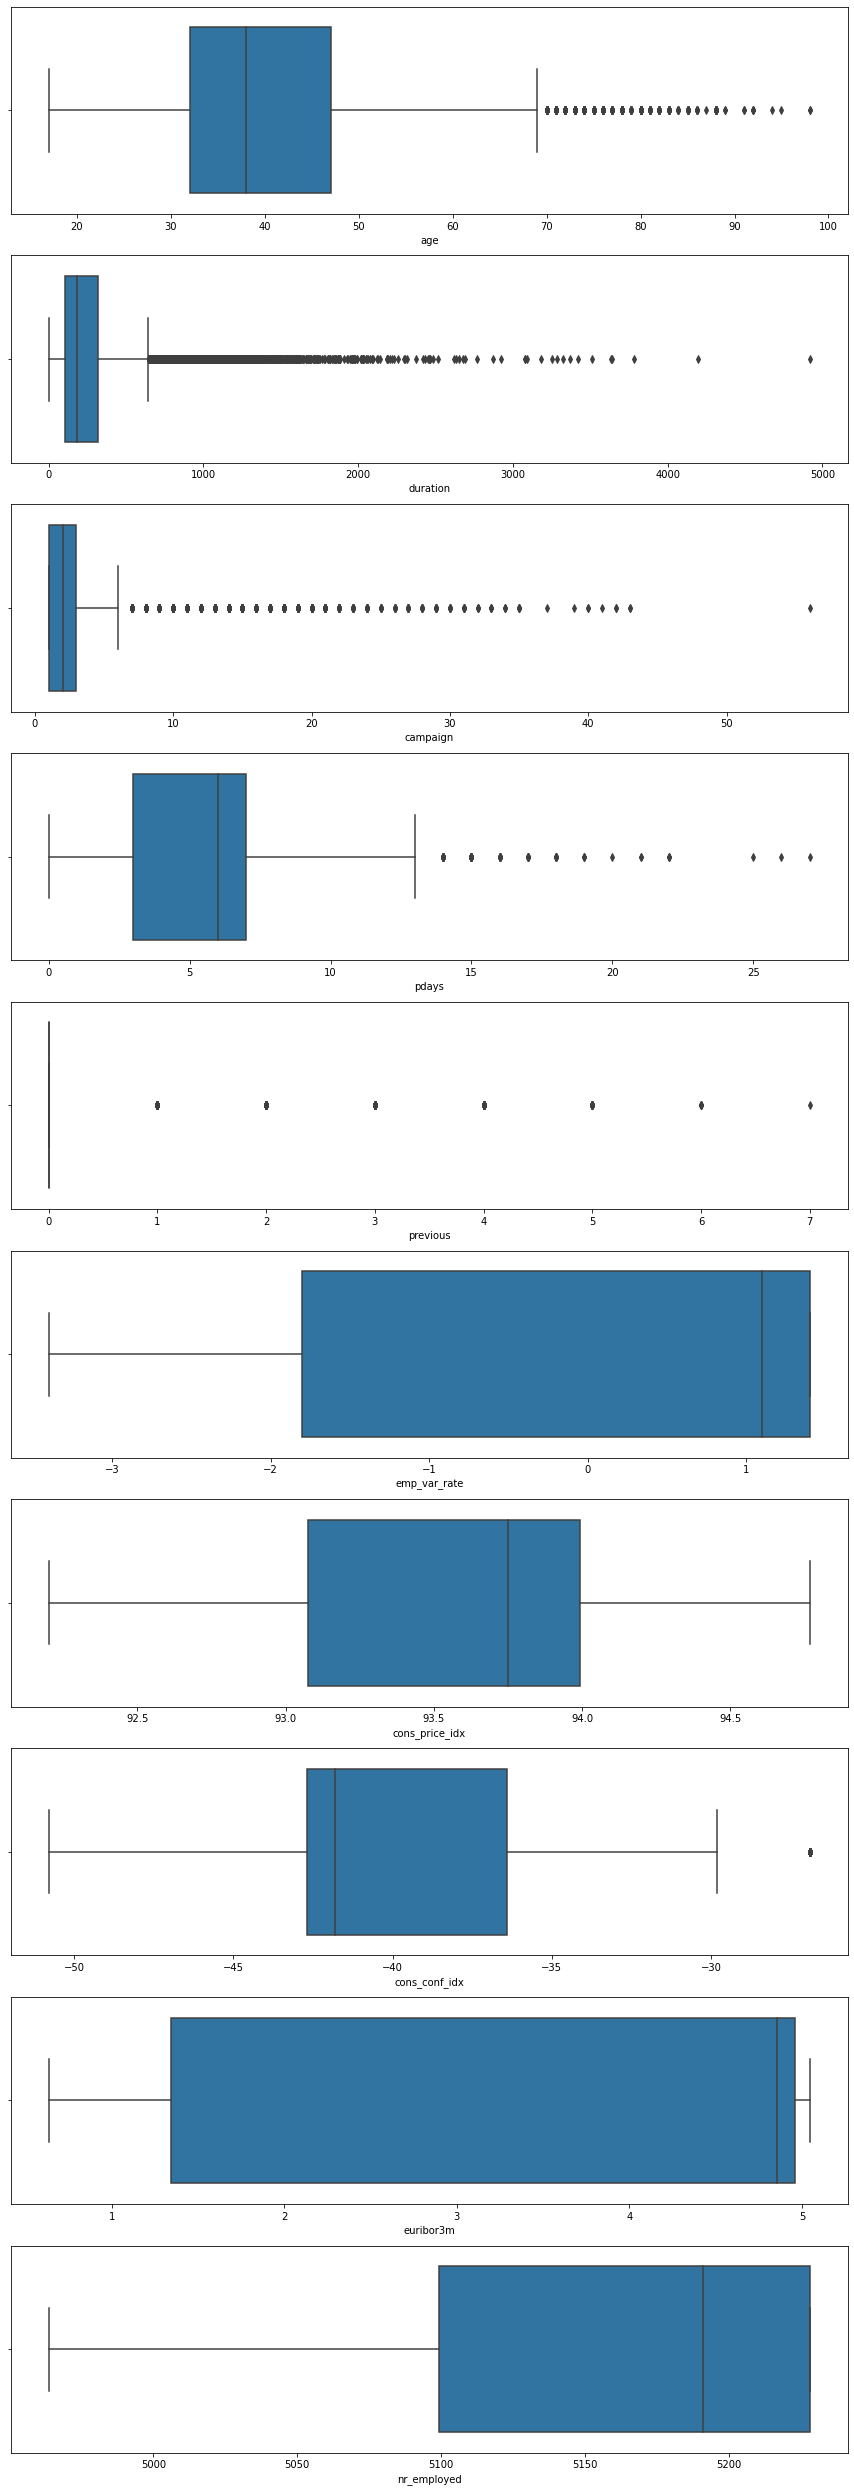

In [9]:
fig, ax = plt.subplots(10, 1, figsize=(15,45))

for i in range(len(df_bank_numericas.columns)):
    sns.boxplot(x=df_bank_numericas.columns[i], data=df_bank_numericas, ax=ax[i])
plt.show()

Identifica sobre el dataframe las filas que son outliers


In [10]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    for col in lista_columnas:
        
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)

        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0:
        
            dicc_indices[col] = (list(outliers_data.index)) 
    
    return dicc_indices 

In [11]:
lista_outliers = list(df_bank_numericas.columns)

In [12]:
filas = detectar_outliers(lista_outliers, df_bank_numericas)

In [13]:
filas

{'age': [27705,
  27749,
  27772,
  27792,
  27794,
  27797,
  27800,
  27802,
  27803,
  27804,
  27805,
  27806,
  27807,
  27808,
  27809,
  27810,
  27818,
  27829,
  27830,
  27836,
  27843,
  27867,
  27871,
  27894,
  27922,
  27942,
  27943,
  27955,
  28212,
  28213,
  28304,
  28448,
  28495,
  28521,
  28531,
  28577,
  28610,
  28723,
  28764,
  29216,
  29254,
  29489,
  29616,
  29659,
  29673,
  29964,
  29968,
  29972,
  29978,
  29981,
  29991,
  29995,
  29997,
  30063,
  30069,
  30070,
  30079,
  30094,
  30101,
  30124,
  30162,
  30205,
  30216,
  30218,
  30232,
  30325,
  30326,
  30381,
  30421,
  30451,
  30580,
  35823,
  35838,
  35846,
  35868,
  35963,
  36173,
  36275,
  36301,
  36373,
  36374,
  36806,
  36987,
  37125,
  37126,
  37159,
  37175,
  37179,
  37181,
  37182,
  37184,
  37195,
  37196,
  37202,
  37208,
  37216,
  37224,
  37226,
  37228,
  37246,
  37249,
  37305,
  37330,
  37344,
  37360,
  37392,
  37443,
  37444,
  37461,
  37468,
  3

Reemplaza los outliers por el estadístico más correcto.


In [14]:
df_bank_numericas.iloc[27705]

age                 70.000
duration           187.000
campaign             3.000
pdays                  NaN
previous             0.000
emp_var_rate        -1.800
cons_price_idx      92.843
cons_conf_idx      -50.000
euribor3m            1.811
nr_employed       5099.100
Name: 27705, dtype: float64

In [15]:
for k, v in filas.items():
    mediana = df_bank_numericas[k].median() 
    print(k)
    print(mediana)
    for i in v: 
        df_bank_numericas.loc[i,k] = mediana

age
38.0
duration
180.0
campaign
2.0
pdays
6.0
previous
0.0
cons_conf_idx
-41.8


In [16]:
df_bank_numericas.iloc[27705]

age                 38.000
duration           187.000
campaign             3.000
pdays                  NaN
previous             0.000
emp_var_rate        -1.800
cons_price_idx      92.843
cons_conf_idx      -50.000
euribor3m            1.811
nr_employed       5099.100
Name: 27705, dtype: float64

Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.